In [1]:
using LinearAlgebra, CairoMakie
CairoMakie.activate!()
Makie.inline!(true)

true

In [2]:
det([ 5 4; 6 3])

-9.000000000000002

In [3]:
[ 5 4; 6 3] \ [90; 81]

2-element Vector{Float64}:
  5.999999999999999
 15.000000000000002

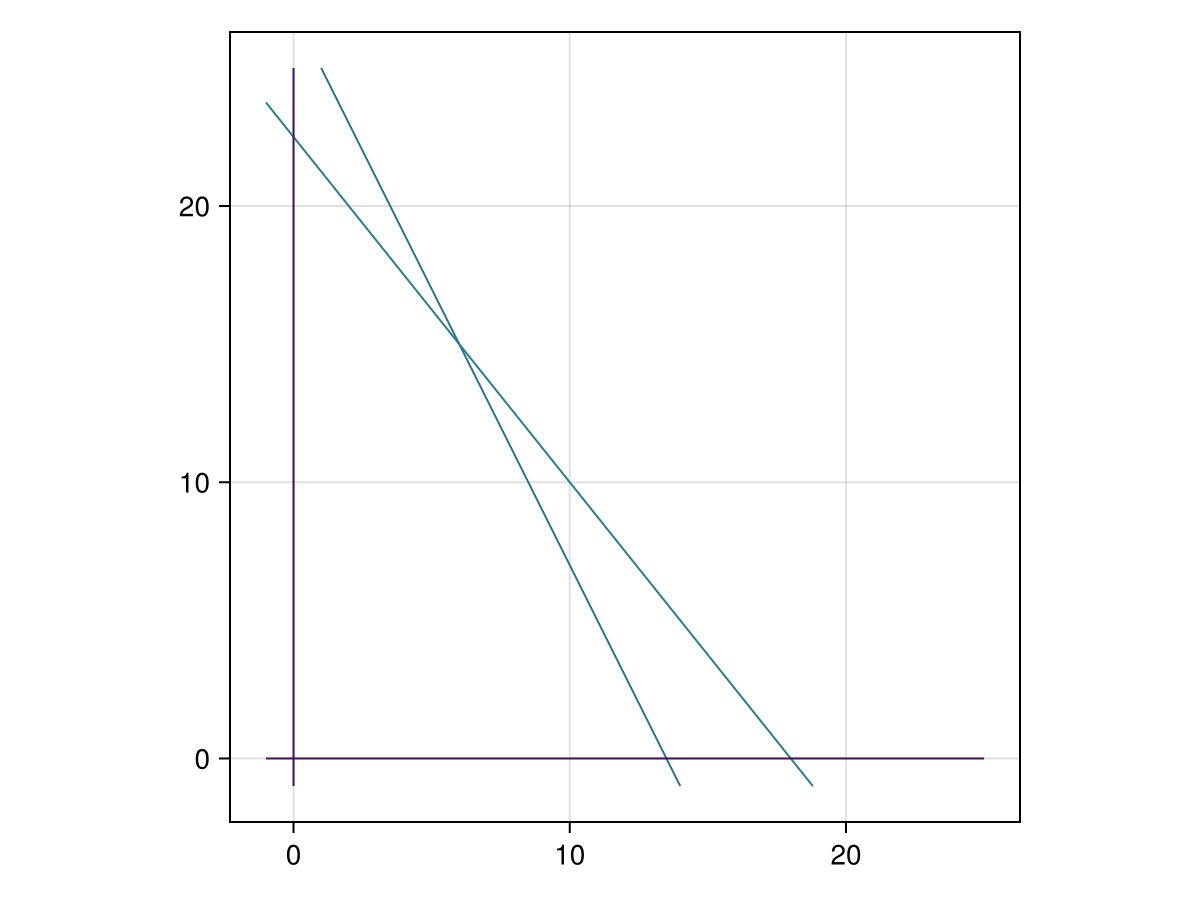

In [4]:
xs = ys = range(-1,25,length=100)
fig, ax = contour(xs,ys,(x,y)->5x+4y, levels=[90], axis=(aspect = 1,))
contour!(ax,xs,ys,(x,y)->6x+3y,levels=[81])
contour!(ax,xs,ys,(x,y)->x,levels=[0])
contour!(ax,xs,ys,(x,y)->y,levels=[0])
fig

In [5]:
save("../../assets/plots/diffeqn/fs-1.png", fig)

CairoMakie.Screen{IMAGE}


In [6]:
using JuMP, HiGHS

In [7]:
m = Model(HiGHS.Optimizer)
@variable(m, x ≥ 0)
@variable(m, y ≥ 0)
@objective(m, Max, 11x+8y)
@constraint(m, 5x+4y ≤ 90)
@constraint(m, 6x+3y ≤ 81)
print(m)

Max 11 x + 8 y
Subject to
 5 x + 4 y ≤ 90
 6 x + 3 y ≤ 81
 x ≥ 0
 y ≥ 0


In [8]:
set_silent(m)
optimize!(m)

In [9]:
is_solved_and_feasible(m)

true

In [10]:
value(x), value(y)

(5.999999999999997, 15.000000000000005)

In [11]:
objective_value(m)

186.0

#### Mailbox Problem

In [12]:
m2 = Model(HiGHS.Optimizer)
@variable(m2, x[1:3, 1:5], Bin)

3×5 Matrix{VariableRef}:
 x[1,1]  x[1,2]  x[1,3]  x[1,4]  x[1,5]
 x[2,1]  x[2,2]  x[2,3]  x[2,4]  x[2,5]
 x[3,1]  x[3,2]  x[3,3]  x[3,4]  x[3,5]

The corners

In [13]:
@constraint(m2, x[1,1]+x[1,2] + x[2,1] ≥ 1)
@constraint(m2, x[1,4]+x[1,5] + x[2,5] ≥ 1)
@constraint(m2, x[3,1]+x[2,1] + x[3,2] ≥ 1)
@constraint(m2, x[3,5]+x[3,4] + x[2,5] ≥ 1)

x[3,4] + x[2,5] + x[3,5] ≥ 1

Top and bottom edges

In [14]:
for j=2:4
  @constraint(m2, x[1,j-1]+x[1,j]+x[1,j+1]+x[2,j] ≥ 1)
  @constraint(m2, x[3,j-1]+x[3,j]+x[3,j+1]+x[2,j] ≥ 1)
end

Left and Right edges

In [15]:
for i=2:2
  @constraint(m2, x[i,1]+x[i-1,1] + x[i+1,1] + x[i,2] ≥ 1)
  @constraint(m2, x[i,5] + x[i-1,5] + x[i+1,5] + x[i,4] ≥ 1)
end

Interior Points

In [16]:
for i=2:2
  for j=2:4
    @constraint(m2, x[i,j] + x[i,j-1] + x[i,j+1] + x[i-1,j] + x[i+1,j] ≥ 1)
  end
end


In [17]:
@objective(m2, Min, sum(x[i,j] for i=1:3, j=1:5))

x[1,1] + x[1,2] + x[1,3] + x[1,4] + x[1,5] + x[2,1] + x[2,2] + x[2,3] + x[2,4] + x[2,5] + x[3,1] + x[3,2] + x[3,3] + x[3,4] + x[3,5]

In [18]:
set_silent(m2)
optimize!(m2)

In [19]:
is_solved_and_feasible(m2)

true

In [20]:
round.(Int,value.(x))

3×5 Matrix{Int64}:
 0  0  1  0  0
 1  0  0  0  1
 0  0  1  0  0

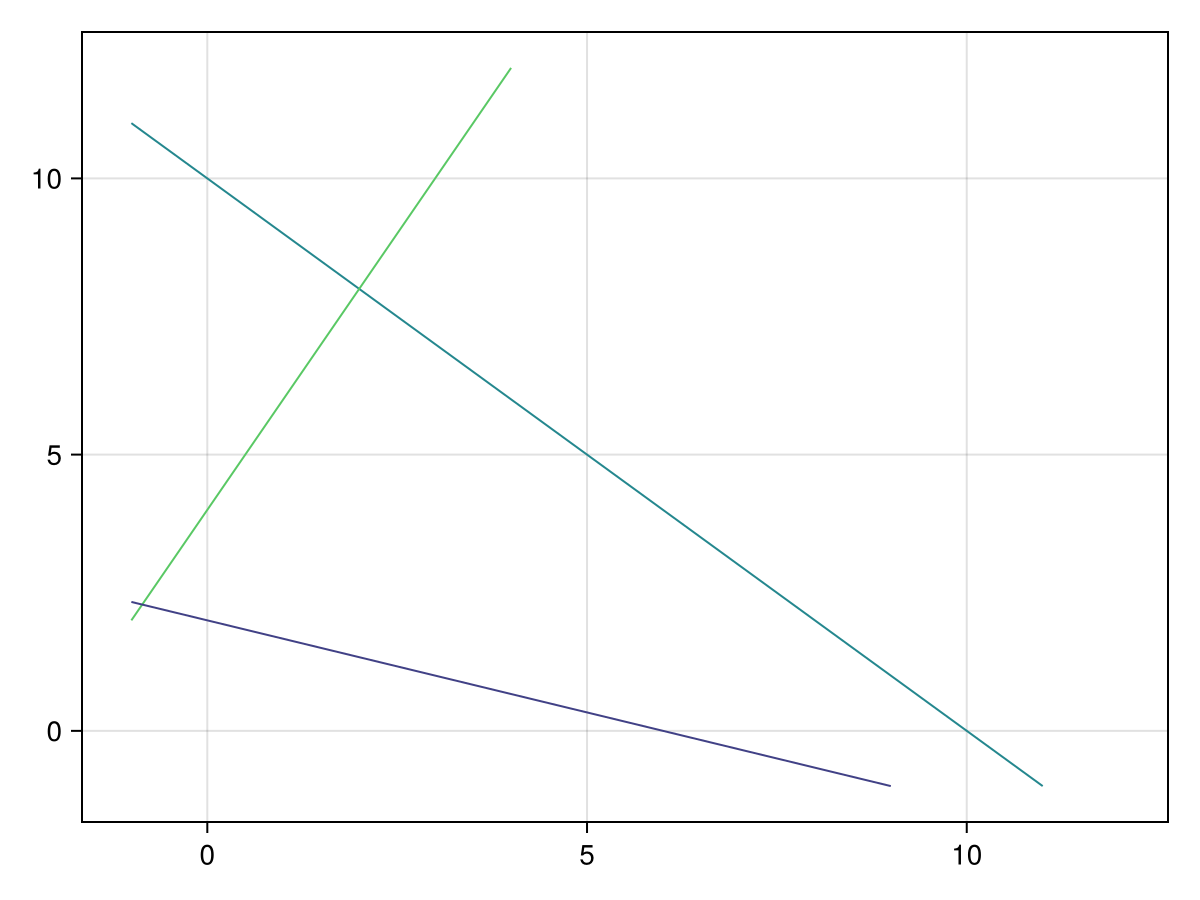

In [31]:
xs = ys = range(-1,12,length=100)
fig, ax = contour(xs, ys, (x,y) -> x+y, levels = [10])
contour!(ax, xs , ys, (x,y) -> -2x+y, levels = [4])
contour!(ax, xs, ys, (x,y) -> x+3y, levels = [6])
fig

In [42]:
m3 = Model(HiGHS.Optimizer)
@variable(m3, x ≥ 0)
@variable(m3, y ≥ 0)
@constraint(m3,x+y ≤ 10)
@constraint(m3,-2x+y ≥ 4)
@constraint(m3,2+3y ≤ 6)
@objective(m3,Max, 3x+4y)
print(m3)

Max 3 x + 4 y
Subject to
 -2 x + y ≥ 4
 x + y ≤ 10
 3 y ≤ 4
 x ≥ 0
 y ≥ 0


In [45]:
optimize!(m3)
is_solved_and_feasible(m3)

Coefficient ranges:
  Matrix [1e+00, 3e+00]
  Cost   [3e+00, 4e+00]
  Bound  [0e+00, 0e+00]
  RHS    [4e+00, 1e+01]
Solving LP without presolve, or with basis, or unconstrained
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0     1.3333316711e+00 Pr: 1(1.33333) 0s
          0     1.3333316711e+00 0s
Model status        : Infeasible
Objective value     :  1.3333333333e+00
Relative P-D gap    :  1.2466832042e-06
HiGHS run time      :          0.00
Copying known dual ray


false